### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

So let's continue with women's volleyball dataset, which as previously prepared (see sprint 6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
wVb = pd.read_csv('wVb.csv')
print(wVb.head())

In [3]:
#drop the column 'index'
wVb.drop('index', axis = 1, inplace = True)
#count the duplciates and drop them, keeping the first element of each
wVb.duplicated().sum()
wVb.drop_duplicates(inplace = True)

   index                   name date_of_birth  height  weight  spike  block  \
0      0     Angelina Lazarenko    13/04/1998     193      80    320    305   
1      1       Svetlana Serbina    15/05/1996     182      71    295    284   
2      2  Ekaterina Shkurikhina    17/06/1996     190      72    306    296   
3      3     Kristina Kurnosova    17/06/1997     176      62    288    278   
4      4     Ekaterina Novikova    07/12/1996     181      70    290    275   

   position_number  country  
0                3       23  
1                1       23  
2                2       23  
3                6       23  
4                1       23  


In [ ]:
#Change the position so it is represented by a number
conditions = [wVb['position_number'] == 1,
             wVb['position_number'] == 2,
             wVb['position_number'] == 3,
             wVb['position_number'] == 4,
             wVb['position_number'] == 6]

newValues = ['setter', 'wing', 'middle', 'opposite', 'libero']

wVb['position'] = np.select(conditions, newValues)
wVb.head()

In [ ]:
#drop any other columns that we will not use
wVb.drop(['date_of_birth', 'position_number', 'country'], axis = 1, inplace = True)

In [47]:
def myMode(ss):
    valueCount = ss.value_counts() #This returns the values sorted, so we just have to pick the first element
    return valueCount.index[0]

def myMedian(ss):
    sortedSS = list(ss.sort_values())
    size = len(sortedSS)
    median = 0
    
    if size%2 == 0:
        median = (sortedSS[size/2] + sortedSS[size/2 + 1])/2
    else:
        median = sortedSS[size//2]+1
    
    return median

def myMean(ss):
    return ss.sum()/ss.size

def StandardDev(ss):
    
    mean = myMean(ss)
    
    return np.sqrt(np.power(ss-mean,2).sum()/(ss.size - 1)) #We get the std for a sample, since we do not have access
                                                            #To all volleyball players.

In [48]:
ss = wVb['height']
print('The mode:', myMode(ss))
print('The median', myMedian(ss))
print('The mean', myMean(ss))
print('Desvest', StandardDev(ss))

The mode: 186
The median 183
The mean 180.979020979021
Desvest 8.262820624252404


### - Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació.

In [50]:
def myCorr(df, xlabel, ylabel):
    x = df[xlabel]
    y = df[ylabel]
    sSize = x.size
    
    return (sSize*(x*y).sum() - x.sum()*y.sum())/(
            np.sqrt(sSize*np.power(x,2).sum() - 
            np.power(x.sum() , 2)) * np.sqrt(sSize*np.power(y,2).sum() - np.power(y.sum(), 2)))

In [51]:
corrCoef = myCorr(wVb, 'height', 'weight')
print(corrCoef)

0.640032317794585


In [52]:
#Check if it is correct
wVb[['height', 'weight']].corr()

,height,weight
height,1.000000,0.640032
weight,0.640032,1.000000


### - Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [53]:
def corrHeatMap(corrMat, ax):
    
    mask = np.triu(corrMat, 1)
    sns.heatmap(corrMat, annot = True, linewidths = 1, mask = mask,
            annot_kws={"size": 10}, cmap = 'Greens', ax = ax)
    ax.set_title('Correlation Matrix Delayed Flights')    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

                   height    weight     spike     block  position_number  \
height           1.000000  0.640032  0.483198  0.407895        -0.046269   
weight           0.640032  1.000000  0.179498  0.096429        -0.128675   
spike            0.483198  0.179498  1.000000  0.926412        -0.098389   
block            0.407895  0.096429  0.926412  1.000000        -0.068772   
position_number -0.046269 -0.128675 -0.098389 -0.068772         1.000000   
country         -0.088319 -0.183433 -0.144460 -0.091026        -0.037706   

                  country  
height          -0.088319  
weight          -0.183433  
spike           -0.144460  
block           -0.091026  
position_number -0.037706  
country          1.000000  


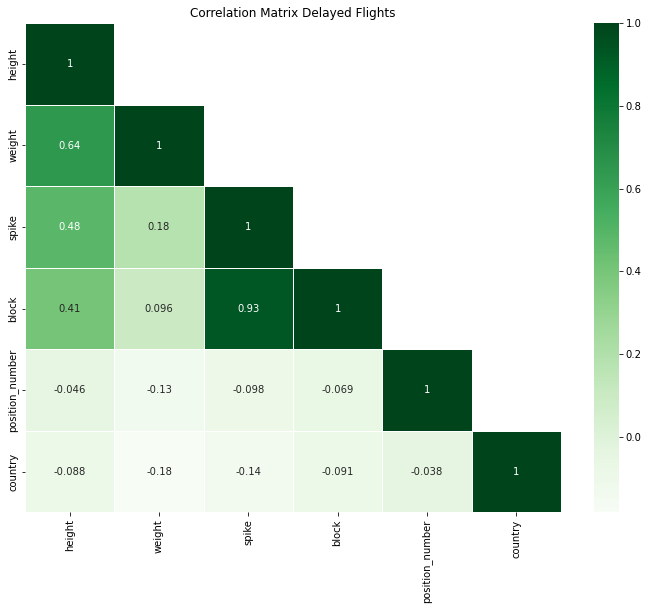

In [54]:
corrMat = wVb.corr()
fig, ax = plt.subplots(figsize = (12,9))

corrHeatMap( corrMat, ax)

print(corrMat)

### Exercici 4

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [95]:
def myGeoMean(df, label):
    #A regular cumulative product would cause bit overflow. To avoid it, we divide by 10 and give the result in meters.
    #Also, if not already float 64, change the dtype to float64
    x = df[label]/10
    xF64 = x.astype('float64')
    
    return np.power(xF64.cumprod().iloc[xF64.size - 1], 1/x.size)

def myHarmMean(df, label):
    
    x = df[label]/10
    #first drop any values that are 0, since they would make infinites
    condition = x == 0
    xx = x[~condition]
    invX = 1/xx
    
    return xx.size/invX.sum()

In [98]:
label = 'height'
print('Geommetric mean', myGeoMean(wVb, label))
print('Harmonic mean', myHarmMean(wVb, label))

Geommetric mean 18.078736089543952
Harmonic mean 18.059111297695402


In [100]:
#Check for errors
import scipy as sp

print('Geommetric mean', sp.stats.mstats.gmean(wVb[label]/10))
print('Harmonic mean', sp.stats.hmean(wVb[label]/10))

Geommetric mean 18.078736089543952
Harmonic mean 18.059111297695402
